In [ ]:
# Statistical & machine learning approches for marketing
Homework Session 1

Shabenoor Kamal

In [1]:
adv <- "str"
# linear regression
# import data
advertising <- read.csv('C:/Users/skamal/Desktop/Stat and machine learning/SML_Section1_v2.1/data/Advertising.csv', row.names=1)
head(advertising)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


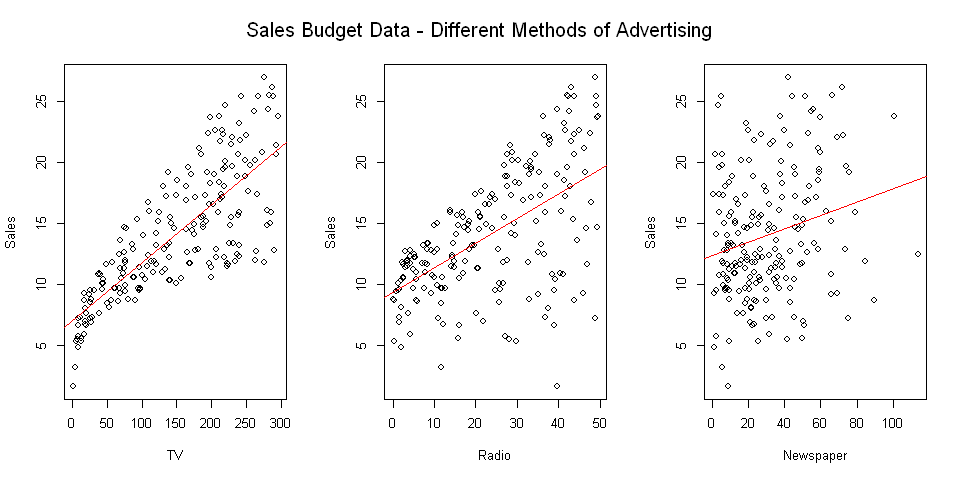

In [4]:
options(repr.plot.width=8, repr.plot.height=4)  #size of the plot
par(mfrow=c(1, 3))  #divide in different regions
# to create three plots with ablines
plot(advertising$TV, advertising$sales, ylab="Sales", xlab="TV") 
abline(lm(sales ~ TV, data=advertising), col='red')
plot(advertising$radio, advertising$sales, ylab="Sales", xlab="Radio")
abline(lm(sales ~ radio, data=advertising), col='red')
plot(advertising$newspaper, advertising$sales, ylab="Sales", xlab="Newspaper")
abline(lm(sales ~ newspaper, data=advertising), col='red')

mtext("Sales Budget Data - Different Methods of Advertising", side=3, line=-2.5, outer=TRUE)

In [ ]:
# Plot for TV vs Sales
options(repr.plot.width=6, repr.plot.height=4.5)  # size of plot
# creating the plot with abline
plot(advertising$TV, advertising$sales, pch=21, cex=0.8, bg='red',
     xlab='TV', ylab='Sales')
abline(lm(sales ~ TV, data=advertising), col='blue')

In [5]:
# Exercise 1

advertising$num <- mapply(function (x,y) (x - mean(advertising$TV)) * (y - mean(advertising$sales)), advertising$TV, advertising$sales)
advertising$denom <- mapply(function (x) (x - mean(advertising$TV))**2, advertising$TV)
#calculate coefficient
B1 <- sum(advertising$num) / sum(advertising$denom)
                
#calculate y intercept
B0 <- mean(advertising$sales) - B1*mean(advertising$TV)

print(paste("B0=",B0, "B1=", B1))

[1] "B0= 7.03259354912769 B1= 0.0475366404330197"


In [6]:
# fit linear model using function
lm_model <- lm(sales ~ TV, data=advertising)
summary(lm_model)


Call:
lm(formula = sales ~ TV, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [7]:
# Exercise 2

advertising$num <- mapply(function (x,y) (x - mean(advertising$radio)) * (y - mean(advertising$sales)), advertising$radio, advertising$sales)
advertising$denom <- mapply(function (x) (x - mean(advertising$radio))**2, advertising$radio)
# to calculate coefficient
B1 <- sum(advertising$num) / sum(advertising$denom)
# to calculate y intercept                
B0 <- mean(advertising$sales) - B1*mean(advertising$radio)

print(paste("B0=",B0, "B1=", B1))

[1] "B0= 9.31163809515828 B1= 0.20249578339244"


In [9]:
# fit linear model using function
lm_model2 <- lm(sales ~ radio, data=advertising)
summary(lm_model2)


Call:
lm(formula = sales ~ radio, data = advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [11]:
# Exercise 3

advertising$num    <- mapply(function (x,y) (x - mean(advertising$TV)) * (y - mean(advertising$sales)), advertising$TV, advertising$sales)
advertising$denom  <- mapply(function (x) (x - mean(advertising$TV))**2, advertising$TV)
# calculate y intercept and coefficient
B1         <- sum(advertising$num) / sum(advertising$denom)           
B0         <- mean(advertising$sales) - B1*mean(advertising$TV)

# metrics to check how good the model is

advertising$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, advertising$TV, advertising$sales) 
RSS        <- sum(advertising$rss)
RSE        <- (RSS/(nrow(advertising)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(advertising) + (mean(advertising$TV))**2 / sum(advertising$denom)))**0.5
SE_B1      <- (RSE**2/sum(advertising$denom))**0.5 

#calculate confidence intervals                             
                  
B0_upperbound  <- B0 + 2 * SE_B0
B0_lowerbound  <- B0 - 2 * SE_B0
                     
B1_upperbound  <- B1 + 2 * SE_B1
B1_lowerbound  <- B1 - 2 * SE_B1


print(paste("95% confidence interval B0:", B0_lowerbound, B0_upperbound))
print(paste("95% confidence interval B1:", B1_lowerbound, B1_upperbound))

[1] "95% confidence interval B0: 6.11690766858074 7.94827942967465"
[1] "95% confidence interval B1: 0.042155426057426 0.0529178548086135"


In [12]:
# Check with the lm function also to compare
lm_model3 <- lm(sales ~ TV, data=advertising)
summary(lm_model3)


Call:
lm(formula = sales ~ TV, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [15]:
# Exercise 4
advertising$num    <- mapply(function (x,y) (x - mean(advertising$radio)) * (y - mean(advertising$sales)), advertising$radio, advertising$sales)
advertising$denom  <- mapply(function (x) (x - mean(advertising$radio))**2, advertising$radio)
# calculate y intercept and coefficient
B1         <- sum(advertising$num) / sum(advertising$denom)           
B0         <- mean(advertising$sales) - B1*mean(advertising$radio)
# check how good the model is using these metrics
advertising$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, advertising$radio, advertising$sales) 
RSS        <- sum(advertising$rss)
RSE        <- (RSS/(nrow(advertising)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(advertising) + (mean(advertising$radio))**2 / sum(advertising$denom)))**0.5
SE_B1      <- (RSE**2/sum(advertising$denom))**0.5 

# calculate t statistic                           
t          <- (B1 - 0) / SE_B1
p          <- 2*pt(t, nrow(advertising)-1, lower=FALSE)

print(paste("T-Statistic: ", t))

[1] "T-Statistic:  9.92076547282496"
[1] "p-Statistic:  4.19916109164091e-19"


In [14]:
# Create model for sales vs radio using lm function
lm_model4 <- lm(sales ~ radio, data=advertising)
summary(lm_model4)


Call:
lm(formula = sales ~ radio, data = advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [16]:

advertising$num    <- mapply(function (x,y) (x - mean(advertising$newspaper)) * (y - mean(advertising$sales)), advertising$newspaper, advertising$sales)
advertising$denom  <- mapply(function (x) (x - mean(advertising$newspaper))**2, advertising$newspaper)
# y intercept and coefficient                             
B1         <- sum(advertising$num) / sum(advertising$denom)           
B0         <- mean(advertising$sales) - B1*mean(advertising$newspaper)
# model metrics
advertising$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, advertising$newspaper, advertising$sales) 
RSS        <- sum(advertising$rss)
RSE        <- (RSS/(nrow(advertising)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(advertising) + (mean(advertising$newspaper))**2 / sum(advertising$denom)))**0.5
SE_B1      <- (RSE**2/sum(advertising$denom))**0.5 
# calculate t statistic  
t          <- (B1 - 0) / SE_B1
p          <- 2*pt(t, nrow(advertising)-1, lower=FALSE)

print(paste("T-Statistic: ", t))

[1] "T-Statistic:  3.29959074363342"


In [ ]:
# Create model for sales vs newspaper using lm function
lm_model5 <- lm(sales ~ newspaper, data=advertising)
summary(lm_model5)

In [17]:
# Exercise 5
advertising$num    <- mapply(function (x,y) (x - mean(advertising$radio)) * (y - mean(advertising$sales)), advertising$radio, advertising$sales)
advertising$denom  <- mapply(function (x) (x - mean(advertising$radio))**2, advertising$radio)
B1         <- sum(advertising$num) / sum(advertising$denom)           
B0         <- mean(advertising$sales) - B1*mean(advertising$radio)

advertising$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, advertising$radio, advertising$sales) 
RSS        <- sum(advertising$rss)
RSE        <- (RSS/(nrow(advertising)-2))**0.5

# caluculate R2 to check how good the model is (how much variance is explained by the variables)
advertising$y2     <- mapply(function (x) (x - mean(advertising$sales))**2, advertising$sales)
Cor_XY     <- sum(advertising$num) / ((sum(advertising$denom)**0.5) * (sum(advertising$y2)**0.5))
R2         <- Cor_XY**2
                     
print(paste("RSE:", RSE, " R2", R2))

[1] "RSE: 4.27494435490106  R2 0.332032455445296"


In [18]:
# check R2 using the lm model function 
lm_model6 <- lm(sales ~ radio, data=advertising)
summary(lm_model6)


Call:
lm(formula = sales ~ radio, data = advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [20]:
advertising$num    <- mapply(function (x,y) (x - mean(advertising$newspaper)) * (y - mean(advertising$sales)), advertising$newspaper, advertising$sales)
advertising$denom  <- mapply(function (x) (x - mean(advertising$newspaper))**2, advertising$newspaper)
B1         <- sum(advertising$num) / sum(advertising$denom)           
B0         <- mean(advertising$sales) - B1*mean(advertising$newspaper)

advertising$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, advertising$newspaper, advertising$sales) 
RSS        <- sum(advertising$rss)
RSE        <- (RSS/(nrow(advertising)-2))**0.5

# calculate R2 for this                           
advertising$y2     <- mapply(function (x) (x - mean(advertising$sales))**2, advertising$sales)
Cor_XY     <- sum(advertising$num) / ((sum(advertising$denom)**0.5) * (sum(advertising$y2)**0.5))
R2         <- Cor_XY**2
                     
print(paste("RSE:", RSE, " R2", R2))

[1] "RSE: 5.09248036652019  R2 0.0521204454443051"


In [19]:
# Check the R2 using the lm function
lm_model7 <- lm(sales ~ newspaper, data=advertising)
summary(lm_model7)


Call:
lm(formula = sales ~ newspaper, data = advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [21]:
# Exercise 6

X <- as.matrix(cbind(1, advertising$TV, advertising$radio, advertising$newspaper))
y <- as.matrix(advertising$sales)

B <- solve(t(X) %*% X) %*% t(X) %*% y

for (coef in 1:nrow(B)){print(paste(coef, "Coefficient:", B[coef]))}


[1] "1 Coefficient: 2.93888936945944"
[1] "2 Coefficient: 0.0457646454553974"
[1] "3 Coefficient: 0.188530016918204"
[1] "4 Coefficient: -0.00103749304247596"


In [22]:
# Compare the results with using the lm function method
lm_model8 <- lm(sales ~ ., data=advertising)
summary(lm_model8)


Call:
lm(formula = sales ~ ., data = advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0522  -0.7168   0.3045   1.0974   2.9067 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.9210985  0.3075467   9.498  < 2e-16 ***
TV           0.0453246  0.0013704  33.074  < 2e-16 ***
radio        0.1844936  0.0092864  19.867  < 2e-16 ***
newspaper    0.0022167  0.0067476   0.329  0.74287    
num          0.0028070  0.0009748   2.880  0.00443 ** 
denom       -0.0003207  0.0001841  -1.742  0.08315 .  
rss          0.0060714  0.0040842   1.487  0.13876    
y2                  NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.646 on 193 degrees of freedom
Multiple R-squared:  0.9034,	Adjusted R-squared:  0.9004 
F-statistic:   301 on 6 and 193 DF,  p-value: < 2.2e-16


# Book questions

In [ ]:
#Exercise 2 (p.52, Chap.2)

#a. Regression problem - Inference. n=500 firms p=profit, number of employees, industry
#b. Classification - Prediction. n=20 p=price charged for the product, marketing budget, competition price and other
#c. Regression
#p=% change USD/EUR, % change US market, % change British market, % change German market=4
#n=52 (number of weeks per year)
#prediction: "predicting the % change in the USD/EUR exchange rate..."



In [23]:
#Exercise 10 (p.56, Chap.2)
library(MASS)
library(ggplot2)

#Number of rows in the dataset
nrow(Boston)

#Number of columns in the dataset
ncol(Boston)

#Investigate the dataset 
str(Boston)

head(Boston)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"

[1] 506

[1] 14

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


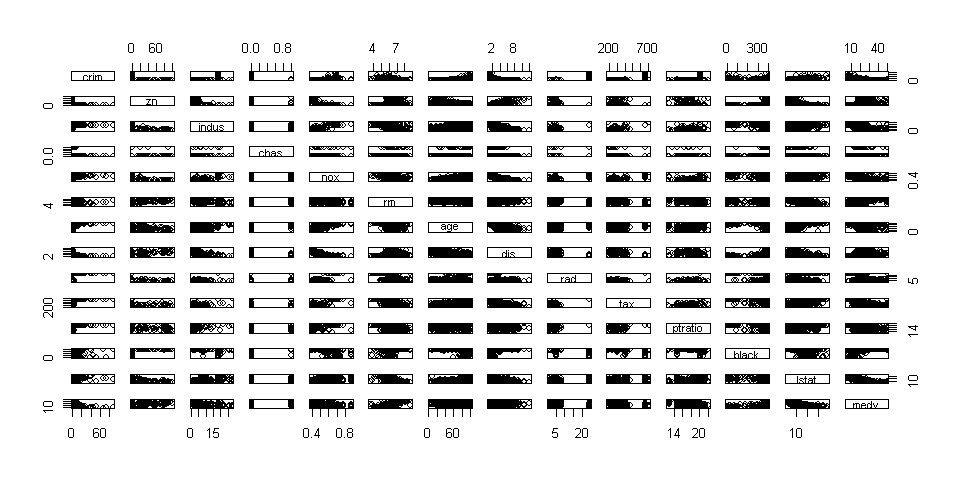

In [24]:
#Pairwise - Auto and selected
pairs(Boston)

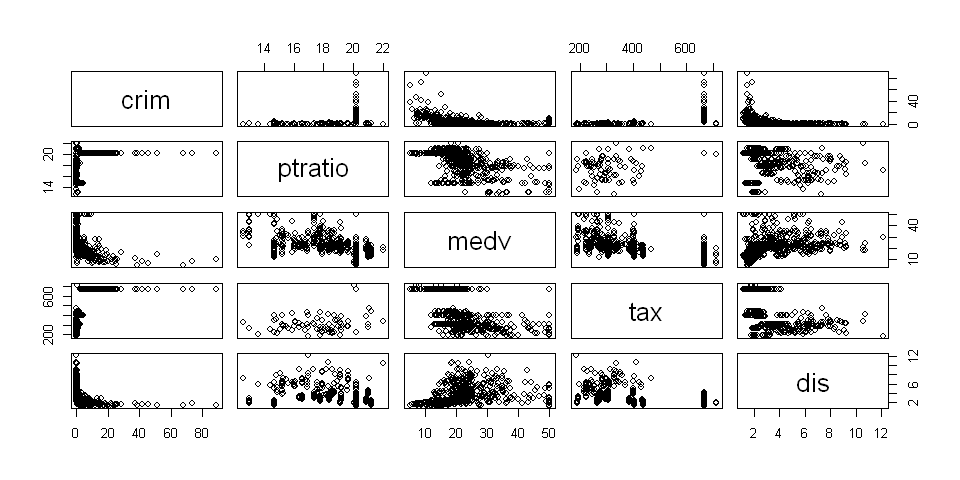

In [25]:
pairs(~ crim + ptratio + medv + tax + dis, Boston)

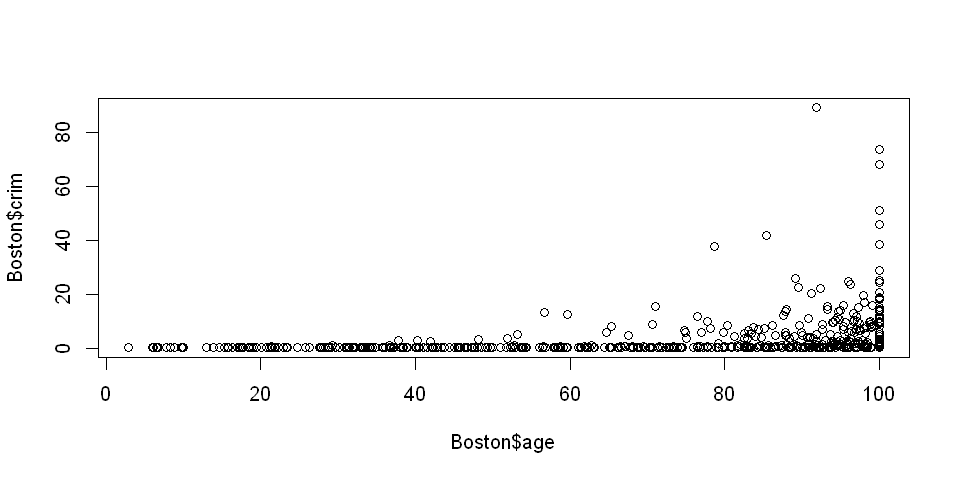

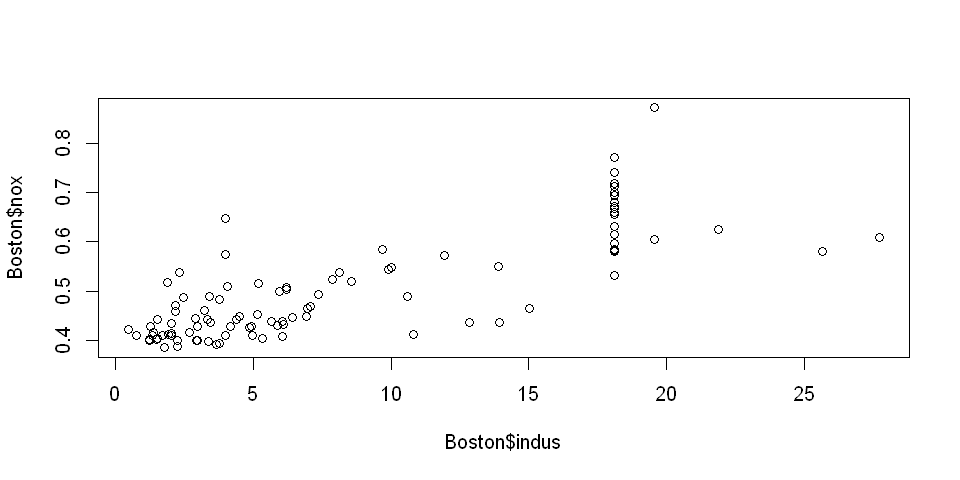

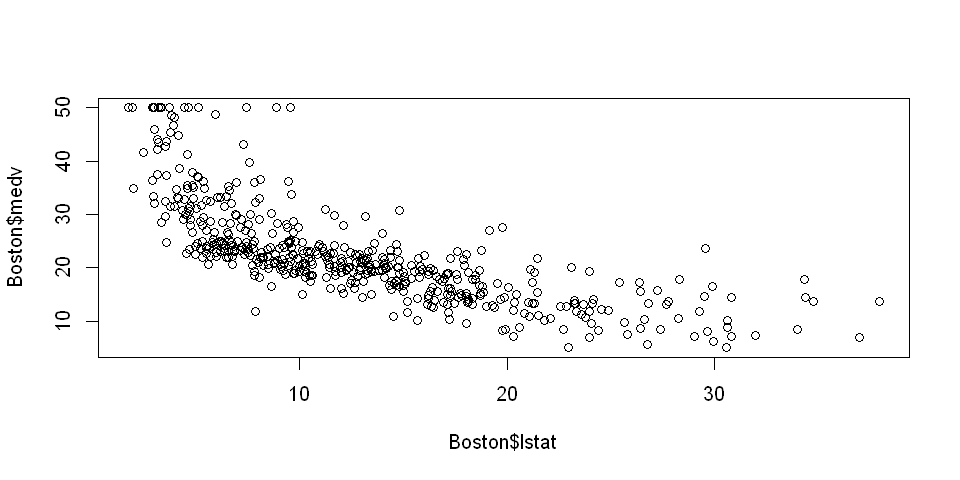

In [26]:

# Crime rises (exponentially after ~70%) with the amount of units built prior 1940
plot(Boston$age, Boston$crim)


# Higher industrial parks, higher nitrogen oxcides concentration
plot(Boston$indus,Boston$nox)


# lower status of the population shows negative correlation with median value of owner-occupied homes in $1000s.
plot(Boston$lstat,Boston$medv)

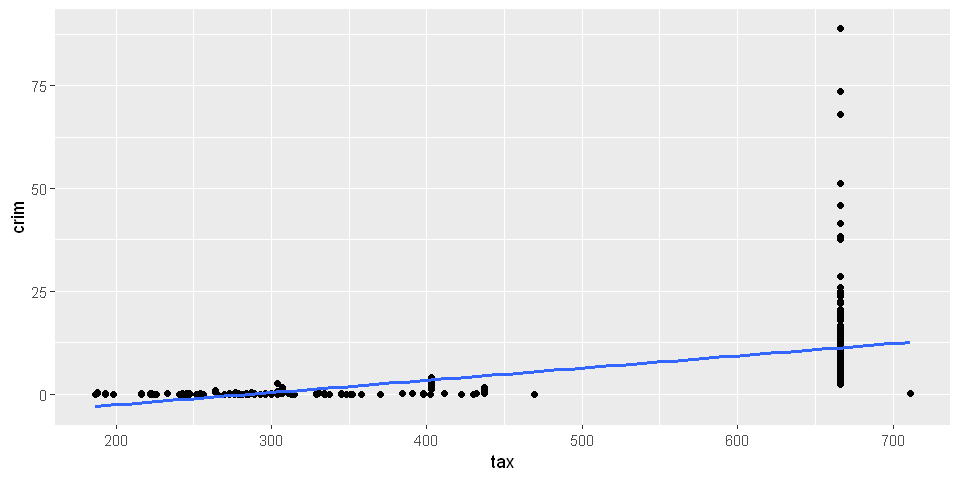

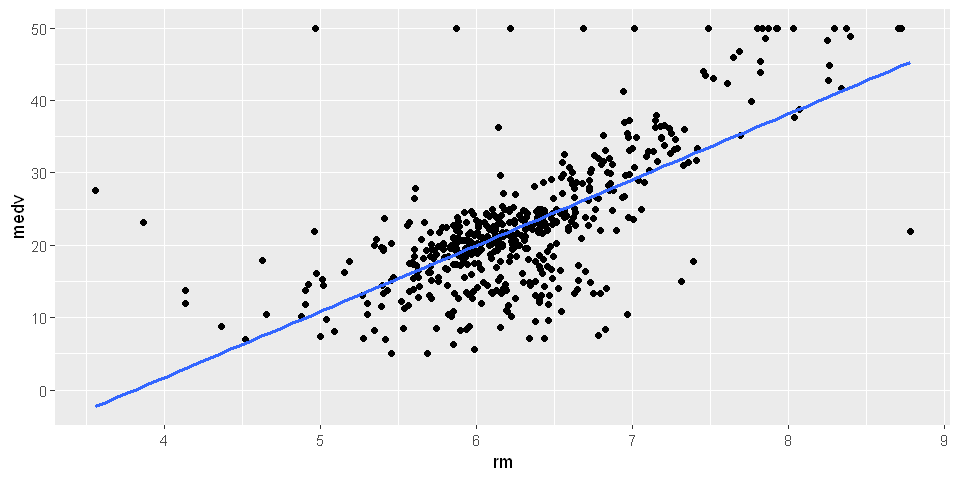

In [27]:
# Part C
par( mfrow = c(2,1) )

# dis: weighted mean of distances to five employment centres, higher crime rates if closer to an employment center
plot(Boston$dis, Boston$crim)
 
# lstat: Percent of lower status of the population - as this becomes higher avg crime rate becomes higher as well
plot(Boston$lstat, Boston$crim)

# higher pupil-teacher ratio has positive relationship with higher crime
ggplot(Boston, aes(x=ptratio, y=crim)) + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)

In [28]:
#Part D
# ranges from 0.00632 to 88.97620 percent
summary(Boston$crim)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

In [29]:
#Tax rate range
#Minimum of 187 to maximum of 711
range(Boston$tax)

[1] 187 711

In [30]:
#Pupil-teacher ratio by town
#Minimum of 12.6 to maximum of 22
range(Boston$ptratio)

[1] 12.6 22.0

In [31]:
summary(Boston[,c("crim", "tax", "ptratio")])

      crim               tax           ptratio     
 Min.   : 0.00632   Min.   :187.0   Min.   :12.60  
 1st Qu.: 0.08204   1st Qu.:279.0   1st Qu.:17.40  
 Median : 0.25651   Median :330.0   Median :19.05  
 Mean   : 3.61352   Mean   :408.2   Mean   :18.46  
 3rd Qu.: 3.67708   3rd Qu.:666.0   3rd Qu.:20.20  
 Max.   :88.97620   Max.   :711.0   Max.   :22.00  

In [32]:
# Part E
sum(Boston$chas)

# Part F
median(Boston$ptratio)

# Part G
Boston[Boston$medv==min(Boston$medv),]

# Part H
table(Boston$rm==Boston["rm">7])
table(Boston$rm==Boston["rm">8])

dim(subset(Boston, rm > 7))
dim(subset(Boston, rm > 8))

summary(subset(Boston, rm > 8))

[1] 35

[1] 19.05

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5



FALSE  TRUE 
 6578   506 


FALSE  TRUE 
 6578   506 

[1] 64 14

[1] 13 14

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

In [ ]:
# Exercise 3 (p.120, Chap.3)

In [ ]:
# Equation y=mx+b-e
 Y = 50 + 20(gpa) + 0.07(iq) + 35(gender) + 0.01(gpa * iq) - 10 (gpa * gender)
# substituting values
# male: (gender = 0)
# female: (gender = 1)

male: 50 + 20 gpa + 0.07 iq + (35*0) + 0.01(gpa * iq)- 10 (gpa * 0)
female: 50 + 20 gpa + 0.07 iq + (35*1) + 0.01(gpa * iq) - 10 (gpa*1)

In [ ]:
# i= not always, hence false
#ii = not always, hence false
#iii= When GPA is high enough men would earn more - true
#iv = GPA needs to be lower, hence false

In [34]:
#  predicted salary
salary= 50 + (20 *4) + (0.07 * 110) + (35*1) + 0.01*(4 * 110) - 10*(4*1)
salary

[1] 137.1

In [ ]:
# Exercise 10 (p.123, Chap.3)

In [41]:
install.packages('ISLR')

Installing package into 'C:/Users/skamal/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\skamal\AppData\Local\Temp\RtmpshWXkj\downloaded_packages


In [42]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.2"

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(Intercept)       Price    UrbanYes       USYes 
13.04346894 -0.05445885 -0.02191615  1.20057270


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


     Sales            Price         US     
 Min.   : 0.000   Min.   : 24.0   No :142  
 1st Qu.: 5.390   1st Qu.:100.0   Yes:258  
 Median : 7.490   Median :117.0            
 Mean   : 7.496   Mean   :115.8            
 3rd Qu.: 9.320   3rd Qu.:131.0            
 Max.   :16.270   Max.   :191.0            

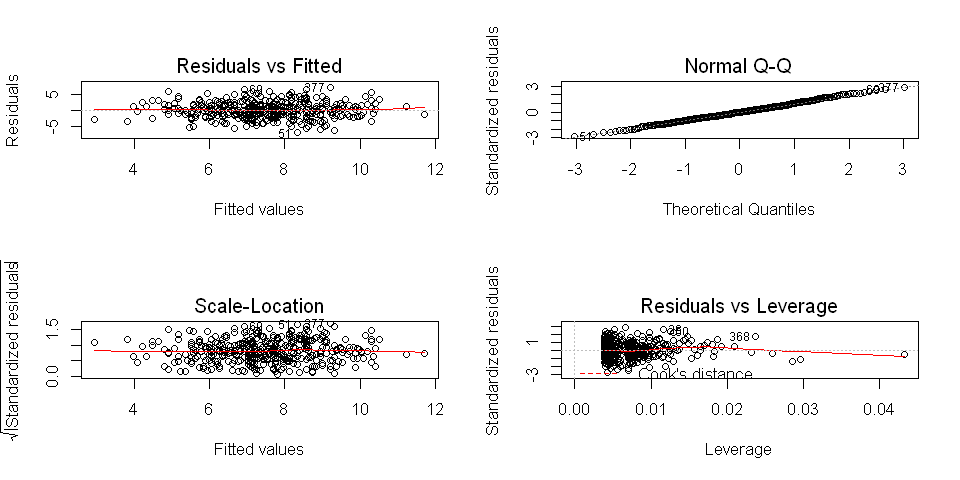

In [49]:
summary(Carseats)

# Part A
lm.fit <- lm(Sales ~ Price + Urban + US, data = Carseats)
summary(lm.fit)

# Part B
#B0 y intercept -> with all the other coefficients being 0, the sales are 13.04
#B1 (price) -> significant (p-value < 0.05), negative: the higher the price, the lower the sales
#B2 (UrbanYes) -> not significant (p-value > 0.05) negative impact on sales
#B3 (USYes) -> significant (p-value < 0.05) positive: if store is in the US, sales are higher 

# Part C
sales <- Price <- UrbanYes <- USYes <- 0
lm.fit$coeff
sales <- 13.04 + -0.05 * Price + -0.02 * UrbanYes + 1.20 * USYes


# Part D
#Urban -> p-value = 0.936 > 0.05 so Urban is on a 95% confidence level not statistically relevant

# Part E
lm.fit1 <- lm(Sales ~ Price + US, data = Carseats)
summary(lm.fit1)

# Part F
#R2 for Model 1 = 0.2335 ~ R2 Model 2 = 0.2354
# both models only explain 23% of the total variance for sales in the dataset

# Part G
confint(lm.fit1, level = 0.95)

# Part H
#there is no evidence for outliers or high leverage observation points
par(mfrow=c(2,2))
plot(lm.fit1)
summary(Carseats[,c("Sales", "Price", "US")])


In [ ]:
#Exercise 15 (p.126, Chap.3)

In [50]:
# Part A
lm.zn = lm(crim~zn, data =Boston)
summary(lm.zn)

lm.indus = lm(crim~indus, data =Boston)
summary(lm.zn)

lm.chas = lm(crim~chas, data =Boston)
summary(lm.chas)

lm.nox = lm(crim~nox, data =Boston)
summary(lm.nox)

lm.rm = lm(crim~rm, data =Boston)
summary(lm.rm)

lm.age = lm(crim~age, data =Boston)
summary(lm.age)

lm.dis = lm(crim~dis, data =Boston)
summary(lm.dis)

lm.rad = lm(crim~rad, data =Boston)
summary(lm.rad)

lm.tax = lm(crim~tax, data =Boston)
summary(lm.tax)

lm.ptratio = lm(crim~ptratio, data =Boston)
summary(lm.ptratio)

lm.black = lm(crim~black, data =Boston)
summary(lm.black)

lm.lstat = lm(crim~lstat, data =Boston)
summary(lm.lstat)

lm.medv = lm(crim~medv, data =Boston)
summary(lm.medv)


Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06



Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06



Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chas         -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094



Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ rm, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.604 -3.952 -2.654  0.989 87.197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.482      3.365   6.088 2.27e-09 ***
rm            -2.684      0.532  -5.045 6.35e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.401 on 504 degrees of freedom
Multiple R-squared:  0.04807,	Adjusted R-squared:  0.04618 
F-statistic: 25.45 on 1 and 504 DF,  p-value: 6.347e-07



Call:
lm(formula = crim ~ age, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.789 -4.257 -1.230  1.527 82.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.77791    0.94398  -4.002 7.22e-05 ***
age          0.10779    0.01274   8.463 2.85e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.057 on 504 degrees of freedom
Multiple R-squared:  0.1244,	Adjusted R-squared:  0.1227 
F-statistic: 71.62 on 1 and 504 DF,  p-value: 2.855e-16



Call:
lm(formula = crim ~ dis, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.708 -4.134 -1.527  1.516 81.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4993     0.7304  13.006   <2e-16 ***
dis          -1.5509     0.1683  -9.213   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.965 on 504 degrees of freedom
Multiple R-squared:  0.1441,	Adjusted R-squared:  0.1425 
F-statistic: 84.89 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ rad, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.164  -1.381  -0.141   0.660  76.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.28716    0.44348  -5.157 3.61e-07 ***
rad          0.61791    0.03433  17.998  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.718 on 504 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:   0.39 
F-statistic: 323.9 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.513  -2.738  -0.194   1.065  77.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.528369   0.815809  -10.45   <2e-16 ***
tax          0.029742   0.001847   16.10   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.997 on 504 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3383 
F-statistic: 259.2 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ ptratio, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-7.654 -3.985 -1.912  1.825 83.353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.6469     3.1473  -5.607 3.40e-08 ***
ptratio       1.1520     0.1694   6.801 2.94e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.24 on 504 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08225 
F-statistic: 46.26 on 1 and 504 DF,  p-value: 2.943e-11



Call:
lm(formula = crim ~ black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.756  -2.299  -2.095  -1.296  86.822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.553529   1.425903  11.609   <2e-16 ***
black       -0.036280   0.003873  -9.367   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.946 on 504 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1466 
F-statistic: 87.74 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -2.822  -0.664   1.079  82.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.33054    0.69376  -4.801 2.09e-06 ***
lstat        0.54880    0.04776  11.491  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.664 on 504 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.206 
F-statistic:   132 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.071 -4.022 -2.343  1.298 80.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.79654    0.93419   12.63   <2e-16 ***
medv        -0.36316    0.03839   -9.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.934 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


In [ ]:
 #All predictors seem to have high associations with crime except for the predictor "chas" which has a negative insignificant value

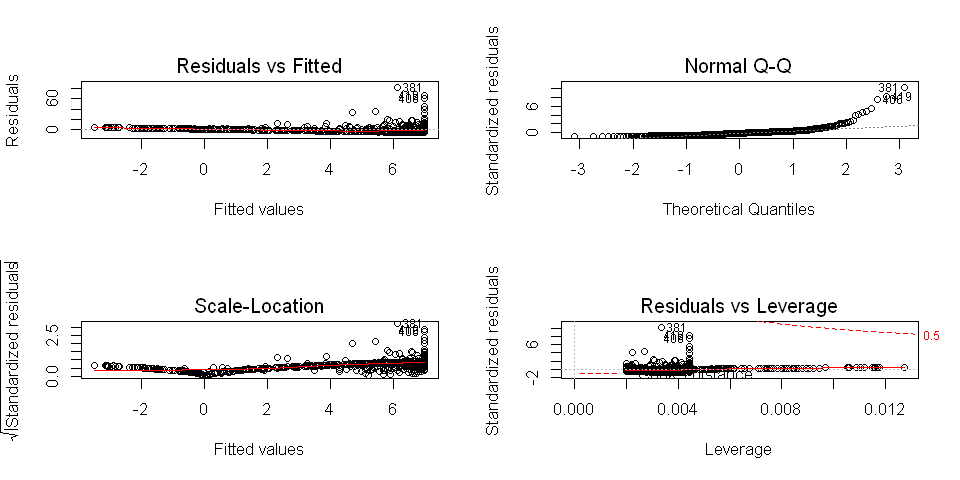

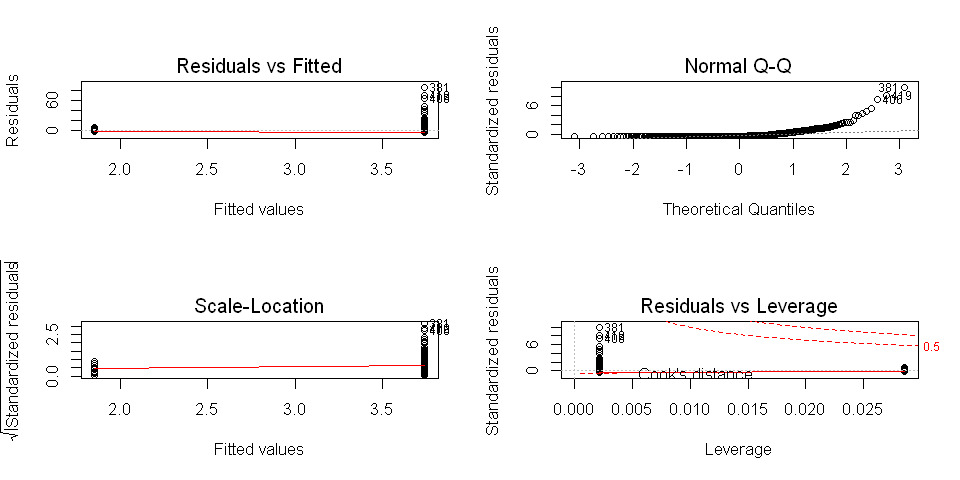

In [51]:
#plots for age predictor vs plots for chas

#age
par(mfrow=c(2,2))
plot(lm.age)

#chas
par(mfrow=c(2,2))
plot(lm.chas)

In [52]:
lm.boston = lm(crim~., data=Boston)
summary(lm.boston)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

In [ ]:
#Based on the output above we could reject null hypothesis for zn, dis, rad, black, medv - these variables are significant

(Intercept)            zn         indus          chas           nox 
 17.033227523   0.044855215  -0.063854824  -0.749133611 -10.313534912 
           rm           age           dis           rad           tax 
  0.430130506   0.001451643  -0.987175726   0.588208591  -0.003780016 
      ptratio         black         lstat          medv 
 -0.271080558  -0.007537505   0.126211376  -0.198886821

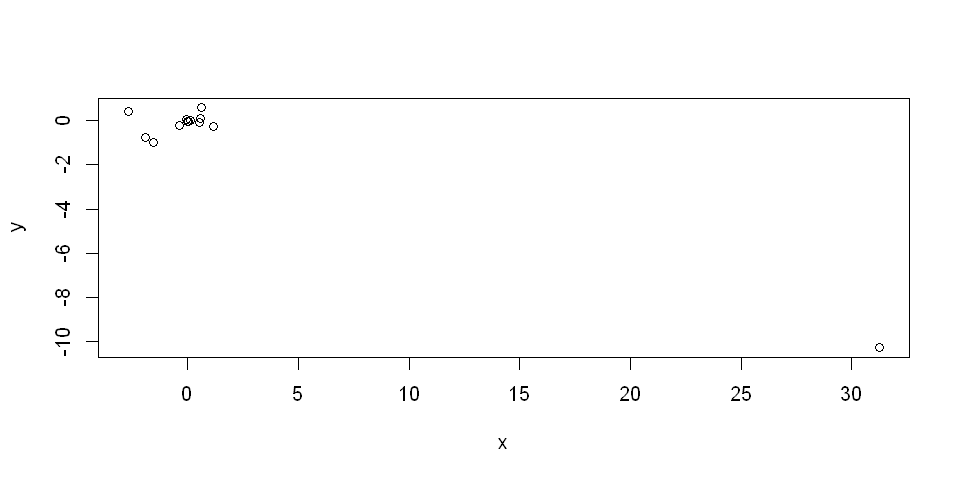

In [53]:
#There are differences in the coefficients as wells as the standard error and t values
coef(lm.boston)

x = c(coefficients(lm.zn)[2],
      coefficients(lm.indus)[2],
      coefficients(lm.chas)[2],
      coefficients(lm.nox)[2],
      coefficients(lm.rm)[2],
      coefficients(lm.age)[2],
      coefficients(lm.dis)[2],
      coefficients(lm.rad)[2],
      coefficients(lm.tax)[2],
      coefficients(lm.ptratio)[2],
      coefficients(lm.black)[2],
      coefficients(lm.lstat)[2],
      coefficients(lm.medv)[2])
y = coefficients(lm.boston)[2:14]
plot(x, y)

In [54]:
# do not show a simple linear relationship between response and predictor variables except for black and chas.

lm.zn = lm(crim~poly(zn,3), data=Boston)
summary(lm.zn)

lm.indus = lm(crim~poly(indus,3), data=Boston)
summary(lm.indus)

lm.nox = lm(crim~poly(nox,3), data=Boston)
summary(lm.nox)

lm.rm = lm(crim~poly(rm,3), data=Boston)
summary(lm.rm) 

lm.age = lm(crim~poly(age,3), data=Boston)
summary(lm.age)

lm.dis = lm(crim~poly(dis,3), data=Boston)
summary(lm.dis)

lm.rad = lm(crim~poly(rad,3), data=Boston)
summary(lm.rad)

lm.tax = lm(crim~poly(tax,3), data=Boston)
summary(lm.tax)

lm.ptratio = lm(crim~poly(ptratio,3), data=Boston)
summary(lm.ptratio)

lm.black = lm(crim~poly(black,3), data=Boston)
summary(lm.black)

lm.lstat = lm(crim~poly(lstat,3), data=Boston)
summary(lm.lstat)

lm.medv = lm(crim~poly(medv,3))
summary(lm.medv)


Call:
lm(formula = crim ~ poly(zn, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.821 -4.614 -1.294  0.473 84.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3722   9.709  < 2e-16 ***
poly(zn, 3)1 -38.7498     8.3722  -4.628  4.7e-06 ***
poly(zn, 3)2  23.9398     8.3722   2.859  0.00442 ** 
poly(zn, 3)3 -10.0719     8.3722  -1.203  0.22954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.372 on 502 degrees of freedom
Multiple R-squared:  0.05824,	Adjusted R-squared:  0.05261 
F-statistic: 10.35 on 3 and 502 DF,  p-value: 1.281e-06



Call:
lm(formula = crim ~ poly(indus, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.278 -2.514  0.054  0.764 79.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.614      0.330  10.950  < 2e-16 ***
poly(indus, 3)1   78.591      7.423  10.587  < 2e-16 ***
poly(indus, 3)2  -24.395      7.423  -3.286  0.00109 ** 
poly(indus, 3)3  -54.130      7.423  -7.292  1.2e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.423 on 502 degrees of freedom
Multiple R-squared:  0.2597,	Adjusted R-squared:  0.2552 
F-statistic: 58.69 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(nox, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.110 -2.068 -0.255  0.739 78.302 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3216  11.237  < 2e-16 ***
poly(nox, 3)1  81.3720     7.2336  11.249  < 2e-16 ***
poly(nox, 3)2 -28.8286     7.2336  -3.985 7.74e-05 ***
poly(nox, 3)3 -60.3619     7.2336  -8.345 6.96e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.234 on 502 degrees of freedom
Multiple R-squared:  0.297,	Adjusted R-squared:  0.2928 
F-statistic: 70.69 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(rm, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.485  -3.468  -2.221  -0.015  87.219 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.6135     0.3703   9.758  < 2e-16 ***
poly(rm, 3)1 -42.3794     8.3297  -5.088 5.13e-07 ***
poly(rm, 3)2  26.5768     8.3297   3.191  0.00151 ** 
poly(rm, 3)3  -5.5103     8.3297  -0.662  0.50858    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.33 on 502 degrees of freedom
Multiple R-squared:  0.06779,	Adjusted R-squared:  0.06222 
F-statistic: 12.17 on 3 and 502 DF,  p-value: 1.067e-07



Call:
lm(formula = crim ~ poly(age, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.762 -2.673 -0.516  0.019 82.842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3485  10.368  < 2e-16 ***
poly(age, 3)1  68.1820     7.8397   8.697  < 2e-16 ***
poly(age, 3)2  37.4845     7.8397   4.781 2.29e-06 ***
poly(age, 3)3  21.3532     7.8397   2.724  0.00668 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.84 on 502 degrees of freedom
Multiple R-squared:  0.1742,	Adjusted R-squared:  0.1693 
F-statistic: 35.31 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(dis, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.757  -2.588   0.031   1.267  76.378 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3259  11.087  < 2e-16 ***
poly(dis, 3)1 -73.3886     7.3315 -10.010  < 2e-16 ***
poly(dis, 3)2  56.3730     7.3315   7.689 7.87e-14 ***
poly(dis, 3)3 -42.6219     7.3315  -5.814 1.09e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.331 on 502 degrees of freedom
Multiple R-squared:  0.2778,	Adjusted R-squared:  0.2735 
F-statistic: 64.37 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(rad, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.381  -0.412  -0.269   0.179  76.217 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.2971  12.164  < 2e-16 ***
poly(rad, 3)1 120.9074     6.6824  18.093  < 2e-16 ***
poly(rad, 3)2  17.4923     6.6824   2.618  0.00912 ** 
poly(rad, 3)3   4.6985     6.6824   0.703  0.48231    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.682 on 502 degrees of freedom
Multiple R-squared:    0.4,	Adjusted R-squared:  0.3965 
F-statistic: 111.6 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(tax, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.273  -1.389   0.046   0.536  76.950 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.6135     0.3047  11.860  < 2e-16 ***
poly(tax, 3)1 112.6458     6.8537  16.436  < 2e-16 ***
poly(tax, 3)2  32.0873     6.8537   4.682 3.67e-06 ***
poly(tax, 3)3  -7.9968     6.8537  -1.167    0.244    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.854 on 502 degrees of freedom
Multiple R-squared:  0.3689,	Adjusted R-squared:  0.3651 
F-statistic:  97.8 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(ptratio, 3), data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.833 -4.146 -1.655  1.408 82.697 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.614      0.361  10.008  < 2e-16 ***
poly(ptratio, 3)1   56.045      8.122   6.901 1.57e-11 ***
poly(ptratio, 3)2   24.775      8.122   3.050  0.00241 ** 
poly(ptratio, 3)3  -22.280      8.122  -2.743  0.00630 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.122 on 502 degrees of freedom
Multiple R-squared:  0.1138,	Adjusted R-squared:  0.1085 
F-statistic: 21.48 on 3 and 502 DF,  p-value: 4.171e-13



Call:
lm(formula = crim ~ poly(black, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.096  -2.343  -2.128  -1.439  86.790 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3536  10.218   <2e-16 ***
poly(black, 3)1 -74.4312     7.9546  -9.357   <2e-16 ***
poly(black, 3)2   5.9264     7.9546   0.745    0.457    
poly(black, 3)3  -4.8346     7.9546  -0.608    0.544    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.955 on 502 degrees of freedom
Multiple R-squared:  0.1498,	Adjusted R-squared:  0.1448 
F-statistic: 29.49 on 3 and 502 DF,  p-value: < 2.2e-16



Call:
lm(formula = crim ~ poly(lstat, 3), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.234  -2.151  -0.486   0.066  83.353 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.6135     0.3392  10.654   <2e-16 ***
poly(lstat, 3)1  88.0697     7.6294  11.543   <2e-16 ***
poly(lstat, 3)2  15.8882     7.6294   2.082   0.0378 *  
poly(lstat, 3)3 -11.5740     7.6294  -1.517   0.1299    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.629 on 502 degrees of freedom
Multiple R-squared:  0.2179,	Adjusted R-squared:  0.2133 
F-statistic: 46.63 on 3 and 502 DF,  p-value: < 2.2e-16


ERROR: Error in eval(predvars, data, env): object 'crim' not found
